# SLU03 | Visualization with Pandas and Matplotlib: Examples notebook
***

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading sample data

In [2]:
data = pd.read_csv("data/online_orders.csv")
data.head()

,country,date,sales,n_items,n_orders,day_of_week
0,Australia,2010-12-01,358.25,107,1,2
1,Australia,2010-12-08,258.90,214,1,2
2,Australia,2010-12-17,415.70,146,1,4
3,Australia,2011-01-06,7154.38,4802,2,3
4,Australia,2011-01-10,81.60,96,1,0


## Setting up

- use matplotlib inline magic before parameter setting
- change default plot size for all plots

In [3]:
%matplotlib inline

inches_wide = 10
inches_high = 10
plt.rcParams["figure.figsize"] = [inches_wide, inches_high]

***
## Plotting

### Scatter Plot

to see the relationship between variables

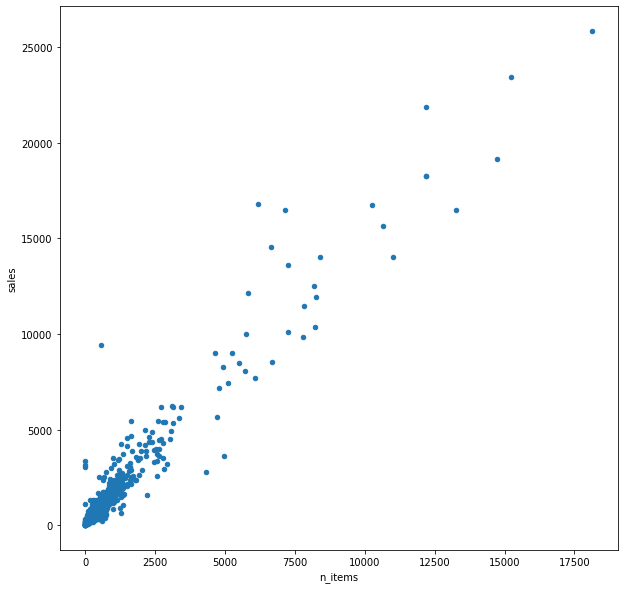

In [4]:
# data.plot(x='n_items', y='sales', kind="scatter");
data.plot.scatter(x='n_items', y='sales');

### Line Chart

to see the trend of one (or many variables) over time (or evolution)

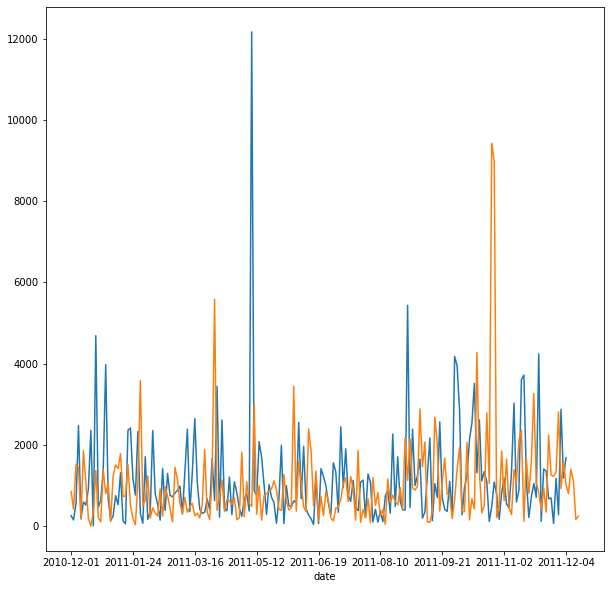

In [5]:
data_indexed = data.set_index('date')
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France");

### Bar Chart

to perform comparisons of discrete quantities among categorical variables

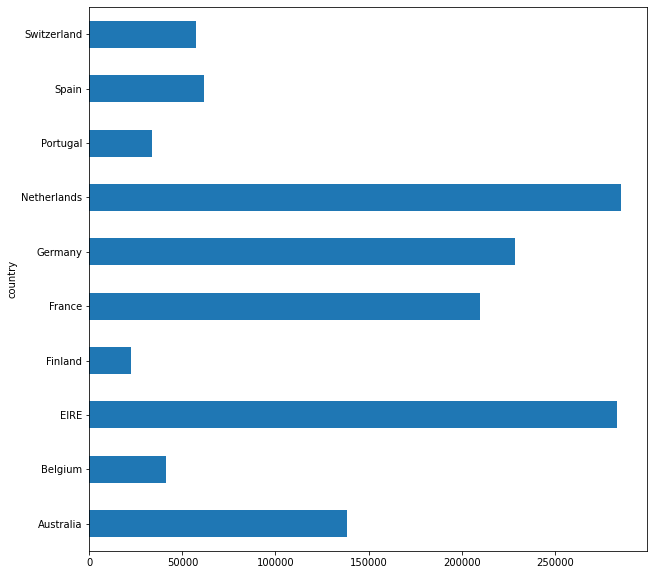

In [6]:
# data.groupby('country')['sales'].sum().plot(kind="barh");
data.groupby('country')['sales'].sum().plot.barh();

### Column Chart

to perform comparisons of discrete quantities among ordinal variables

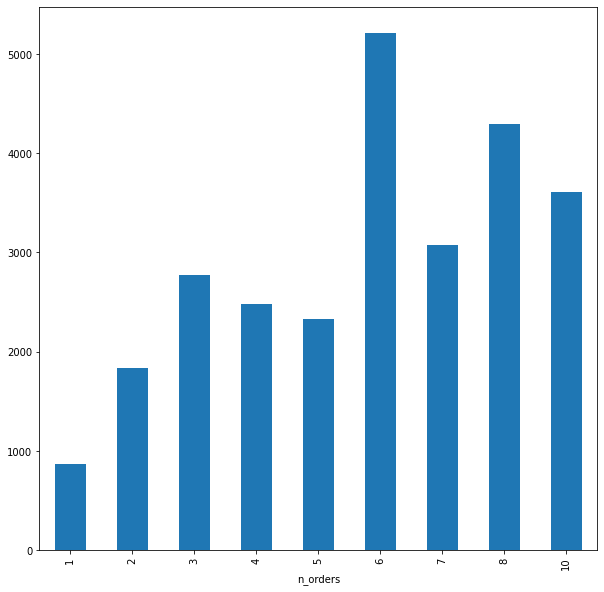

In [7]:
# data.groupby('n_orders')['sales'].mean().plot(kind="bar");
data.groupby('n_orders')['sales'].mean().plot.bar();

#### Stacked Bar/Column Chart

 to show the distribution between the data, detailing the comparison with other categorical elements

In [8]:
data['weekday'] = pd.to_datetime(data['date']).dt.day_name()

# Creating a new DataFrame with the sum of n_orders by country and weekday
country_sales_by_weekday = data.pivot_table(values=['n_orders'], index='country', columns='weekday', aggfunc='sum')

# converting to percentage
country_sales_by_weekday = country_sales_by_weekday.div(country_sales_by_weekday.sum(1), axis=0) 

country_sales_by_weekday

n_orders                                                  
weekday        Friday    Monday    Sunday  Thursday   Tuesday Wednesday
country                                                                
Australia    0.157895  0.122807  0.052632  0.280702  0.140351  0.245614
Belgium      0.234694  0.132653  0.061224  0.255102  0.163265  0.153061
EIRE         0.166667  0.215278  0.065972  0.211806  0.163194  0.177083
Finland      0.195122  0.073171  0.048780  0.317073  0.243902  0.121951
France       0.188776  0.150510  0.086735  0.196429  0.153061  0.224490
Germany      0.205689  0.161926  0.074398  0.260394  0.133479  0.164114
Netherlands  0.159574  0.095745  0.021277  0.255319  0.234043  0.234043
Portugal     0.137931  0.275862  0.051724  0.224138  0.103448  0.206897
Spain        0.144444  0.166667  0.111111  0.244444  0.144444  0.188889
Switzerland  0.296296  0.074074  0.074074  0.129630  0.129630  0.296296

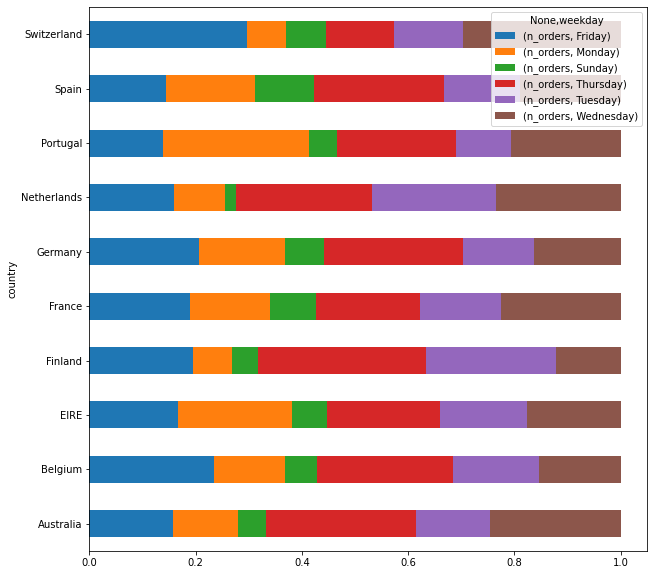

In [9]:
#dpt.plot(kind='barh', stacked=True);
country_sales_by_weekday.plot.barh(stacked=True);

### Histogram

to make sure that nothing is fishy with the data

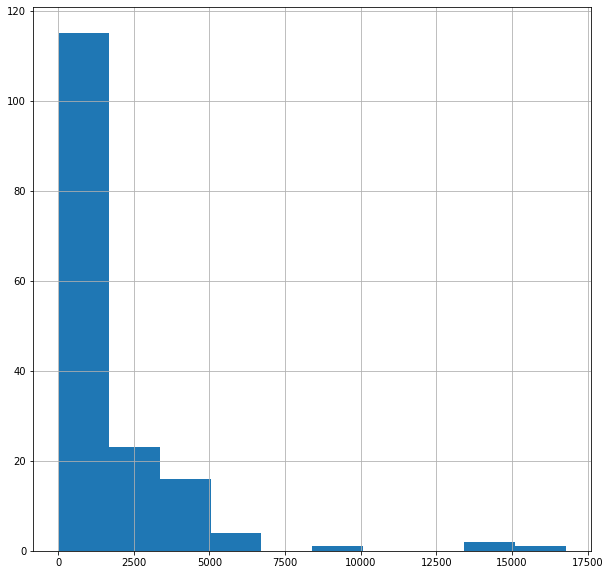

In [10]:
# data[data.country=='EIRE'].sales.plot(kind="hist");
data[data.country=='EIRE'].sales.hist();

> **Histogram with an limit on the x axis**

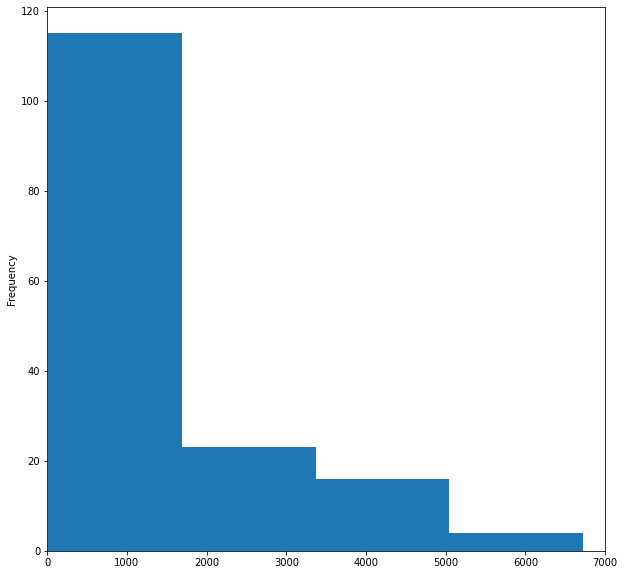

In [11]:
# data[data.country=='EIRE'].sales.plot(xlim=(0,7000), kind="hist");
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000));

> **Histogram with an limit on the y axis**

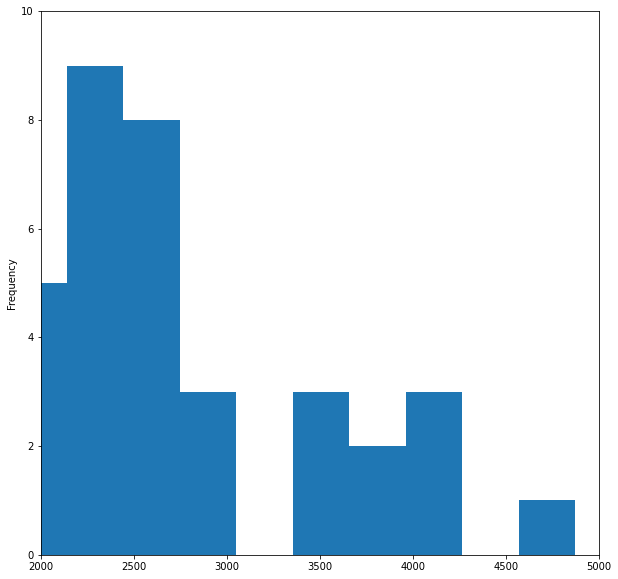

In [12]:
# data[data.country=='EIRE'].sales.plot(xlim=(2000,5000), bins=70, kind="hist");
data[data.country=='Germany'].sales.plot.hist(xlim=(2000,5000), ylim=(0,10), bins=40);

> **Histogram, with a specific number of groups**

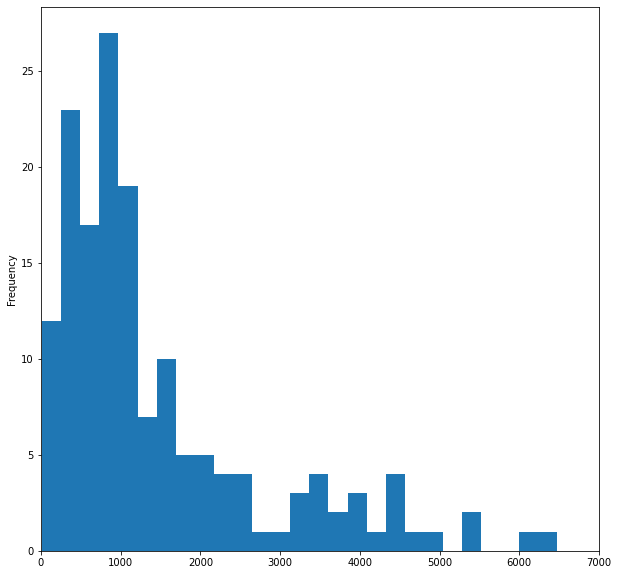

In [13]:
# data[data.country=='EIRE'].sales.plot(xlim=(0,7000), bins=70, kind="hist");
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

### Boxplot

to compare how a variable is distributed among different groups

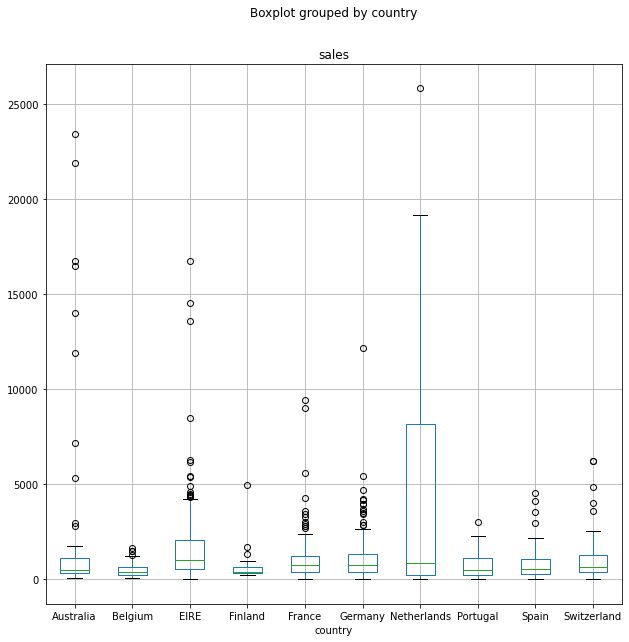

In [14]:
data.boxplot(column="sales", by="country");

***
## Customizing

### Available styles

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Changing style

In [16]:
plt.style.use('seaborn')

### Customizing plots

In [17]:
# we index the data by date
data_indexed = data.set_index('date')

In [18]:
# bigger plots
plt.rcParams["figure.figsize"] = [14, 14]

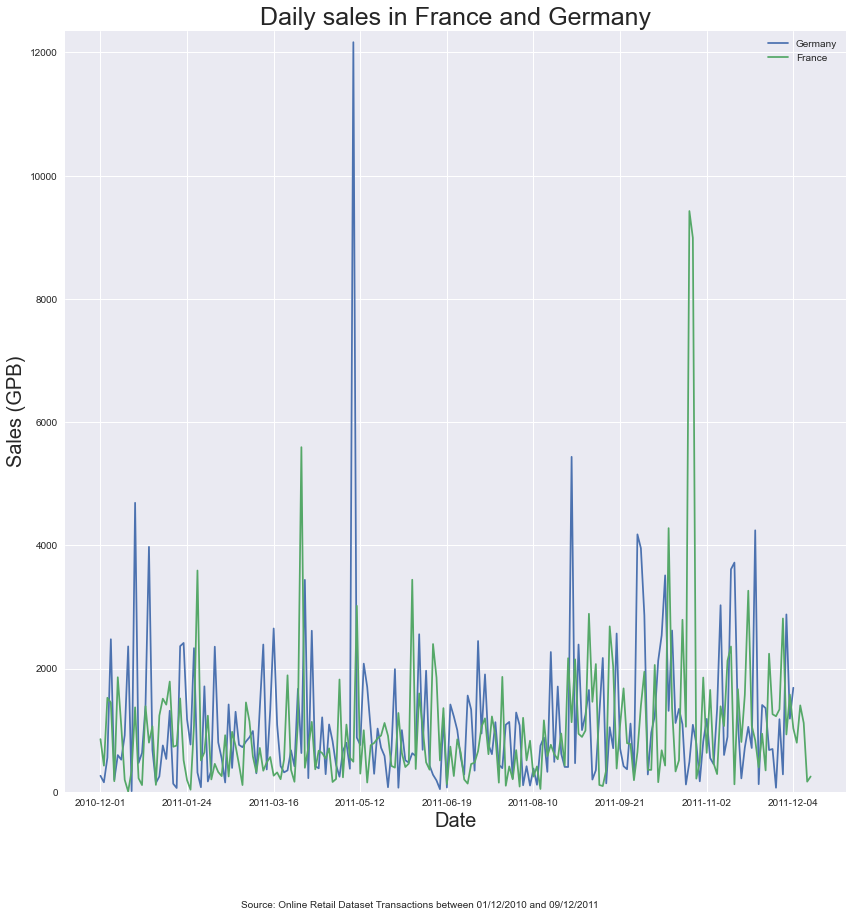

In [19]:
# setting the labels
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France")

# limit the y axis
plt.ylim(0, 12350)

# show the legend for the two labels
plt.legend()

# display a title
plt.title("Daily sales in France and Germany", size=25)

# change the label on the x axis
plt.xlabel("Date", size=20)

# change the label in the y axis
plt.ylabel("Sales (GPB)", size=20)

# add text at the bottom
plt.figtext(.3, .01, "Source: Online Retail Dataset Transactions between 01/12/2010 and 09/12/2011");